## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
regimen_data = pd.merge(mouse_metadata,study_results,on = 'Mouse ID', how = 'inner')
# Display the data table for preview
regimen_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice.
mouse_id_count = len(regimen_data['Mouse ID'].unique())
mouse_id_count = pd.DataFrame({'Total Mice': [mouse_id_count]})
mouse_id_count

,Total Mice
0,249


In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = regimen_data[regimen_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_mice = duplicate_df['Mouse ID'].unique()
duplicate_mice = duplicate_mice[0]
print('The duplicate mice have ID number ' + duplicate_mice)

The duplicate mice have ID number g989


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
regimen_data_dup = regimen_data[regimen_data['Mouse ID'] == duplicate_mice]
regimen_data_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
regimen_data_clean = regimen_data.drop(regimen_data_dup.index)
regimen_data_clean = regimen_data_clean.reset_index(drop=True)
regimen_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_id_count = len(regimen_data_clean['Mouse ID'].unique())
clean_mouse_id_count = pd.DataFrame({'Total Mice': [clean_mouse_id_count]})
clean_mouse_id_count

,Total Mice
0,248


## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group = regimen_data_clean.groupby(['Drug Regimen'])
regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()
regimen_median = regimen_group['Tumor Volume (mm3)'].median()
regimen_variance = regimen_group['Tumor Volume (mm3)'].var()
regimen_std = regimen_group['Tumor Volume (mm3)'].std()
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_sum = pd.DataFrame({'Mean': regimen_mean,
                          'Median': regimen_median,
                          'Variance': regimen_variance,
                          'Standard Deviation': regimen_std,
                          'SEM': regimen_sem})
tumor_sum


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_sum2 = regimen_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std', 'sem'])
tumor_sum2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count of Timepoints')

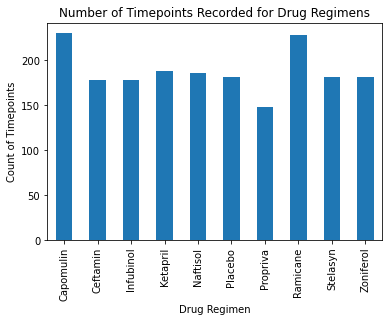

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_point_count = regimen_group['Timepoint'].count()
time_point_count.plot(kind = 'bar')
plt.title('Number of Timepoints Recorded for Drug Regimens')
plt.ylabel('Count of Timepoints')

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
